# Fraudulent Transactions Prediction

1. the dataset is to be identify about a transaction to predict whether it  is Fraudulent or Not

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

In [2]:
#Read The Dataset
df=pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# describe the dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
#data structure
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(6362620, 11)

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
#data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


we select isFraud as our target variable

In [9]:
#cheking the missing values
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64>

In [10]:
#count the duplicates
df[df.duplicated()].shape

(0, 11)

In [11]:
#To identify the unique values
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
skew_data=df.skew()
skew_data

C:\Users\advai\AppData\Local\Temp/ipykernel_3100/4169615629.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_data=df.skew()


step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [13]:
# Pairwise Pearson correlations
correlations = df.corr(method='pearson')
print(correlations)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

In [14]:
df.corr()['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

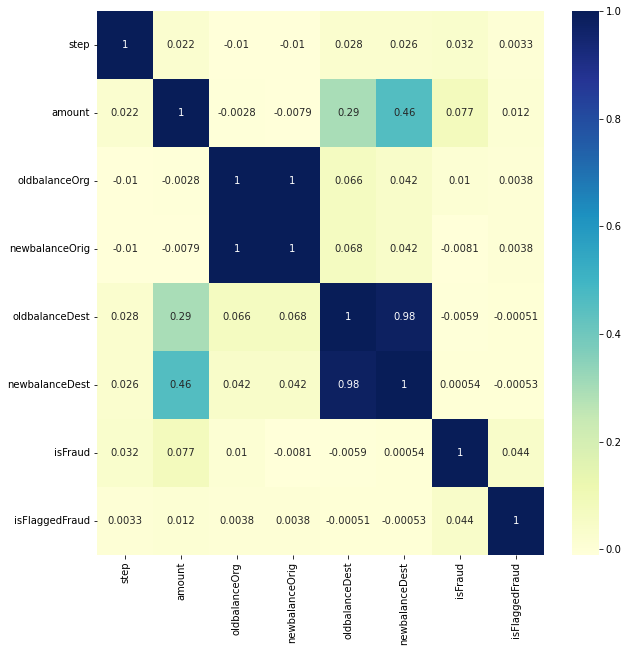

In [15]:
mat=df.corr()
top_corr_features=mat.index
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='YlGnBu')

In [16]:
fraud= df.groupby('isFraud').size()
print(fraud)

isFraud
0    6354407
1       8213
dtype: int64


In [17]:
fraud=df.isFraud.value_counts(normalize=True)*100
fraud

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

from the above data we can infer that less than 0.13% of the total transaction are fraudulent

In [18]:
false=df[df['isFraud']==1]
true=df[df['isFraud']==0]
n=len(false)/float(len(true))
print('false detection:{}'.format(len(df[df['isFraud']==1])))
print('true detection:{}'.format(len(df[df['isFraud']==0])))

false detection:8213
true detection:6354407


In [19]:
false=df[df['isFraud']==1]
true=df[df['isFraud']==0]
print('false detection')
print(false.amount.describe()/100,"\n")

print('true detection')
print(true.amount.describe()/100)

false detection
count        82.130000
mean      14679.672991
std       24042.529472
min           0.000000
25%        1270.913300
50%        4414.234400
75%       15177.714800
max      100000.000000
Name: amount, dtype: float64 

true detection
count     63544.070000
mean       1781.970417
std        5962.369813
min           0.000100
25%         133.683950
50%         746.847200
75%        2083.647600
max      924455.166400
Name: amount, dtype: float64


# Data Visualization for descrete data

<AxesSubplot:>

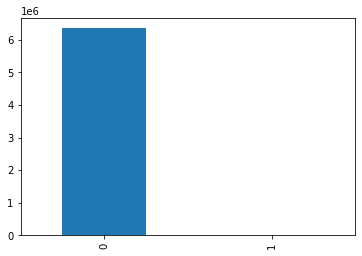

In [20]:
df.isFraud.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='isFraud'>

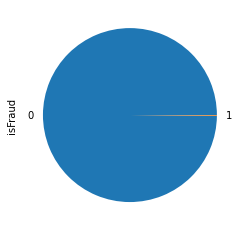

In [21]:
df.isFraud.value_counts().plot(kind='pie')

<AxesSubplot:>

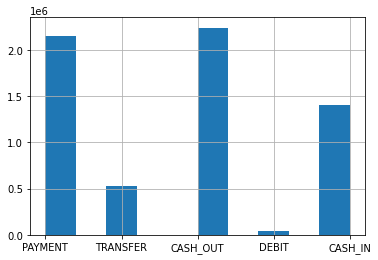

In [22]:
#histogram of types of transaction
df['type'].hist()

<AxesSubplot:>

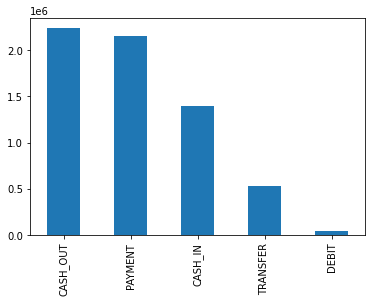

In [23]:
df.type.value_counts().plot(kind='bar')

In [24]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [25]:
print("individual type of transactions:")
print((df.type.value_counts()/df.type.value_counts().sum())*100)

individual type of transactions:
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


Text(0.5, 1.0, 'Types of Transactions')

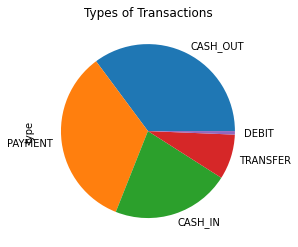

In [26]:
df.type.value_counts().plot(kind='pie')
plt.title('Types of Transactions')

<AxesSubplot:>

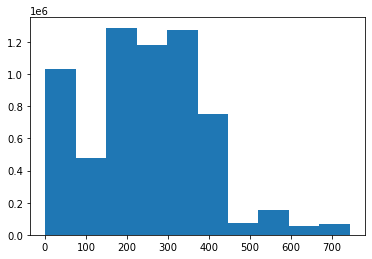

In [27]:
df.step.hist(grid=False)

C:\Users\advai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

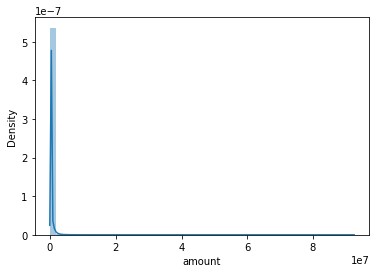

In [28]:
sns.distplot(df['amount'])

C:\Users\advai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

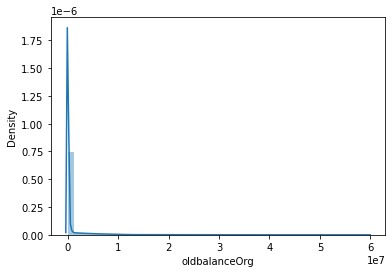

In [29]:
sns.distplot(df['oldbalanceOrg'])

In [30]:
pd.crosstab(df.isFraud, df.type)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


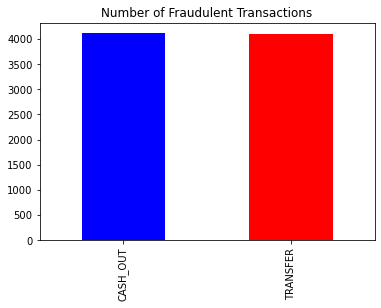

In [31]:
df.type[df.isFraud == 1].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Number of Fraudulent Transactions");

From the above crosstab we can infer that fraudulent transactions take place only in CASH_OUT and TRASNFER type of transactions where 4116 of CASH_OUT and 4097 of TRANSFER transactions where fraudulent.

# Relationship between the Amount and our Target attribute(isFraud)

In [32]:
#Amount Details for all the Transactions
print("Maximum transaction amount=", df.amount.max())
print("Minimum transaction amount=", df.amount.min())
print("Average transaction amount=",round(df.amount.mean(),2))

Maximum transaction amount= 92445516.64
Minimum transaction amount= 0.0
Average transaction amount= 179861.9


In [33]:
print("Maximum amount transaction occured:", df.type[df.amount == df.amount.max()])

Maximum amount transaction occured: 3686583    TRANSFER
Name: type, dtype: object


In [34]:
#Amount Details for CASH_OUT and TRANSFER Transactions
print("Maximum cash_out amount:", df.amount[df.type=="CASH_OUT"].max())
print("Minimum cash_out amount:", df.amount[df.type=="CASH_OUT"].min())
print("Average cash_out amount:", round(df.amount[df.type=="CASH_OUT"].mean(),2))

print("\nMaximum transfer amount:", df.amount[df.type=="TRANSFER"].max())
print("Minimum transfer amount:", df.amount[df.type=="TRANSFER"].min())
print("Average transfer amount:", round(df.amount[df.type=="TRANSFER"].mean(),2))

Maximum cash_out amount: 10000000.0
Minimum cash_out amount: 0.0
Average cash_out amount: 176273.96

Maximum transfer amount: 92445516.64
Minimum transfer amount: 2.6
Average transfer amount: 910647.01


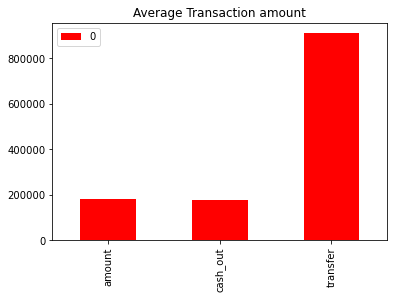

In [35]:
avg = {"amount":round(df.amount.mean(),2),
       "cash_out": round(df.amount[df.type=="CASH_OUT"].mean(),2),
       "transfer": round(df.amount[df.type=="TRANSFER"].mean(),2) }
pd.DataFrame(avg.values(), index=avg.keys()).plot(kind="bar", color="red")
plt.title("Average Transaction amount")
plt.show()

In [36]:
flagged = df[df.isFlaggedFraud==1]
flagged.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [37]:
print("The Number of Transactions to be isFlaggedFraud:", len(flagged))

The Number of Transactions to be isFlaggedFraud: 16


In [38]:
flagged.isFraud

2736446    1
3247297    1
3760288    1
5563713    1
5996407    1
5996409    1
6168499    1
6205439    1
6266413    1
6281482    1
6281484    1
6296014    1
6351225    1
6362460    1
6362462    1
6362584    1
Name: isFraud, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


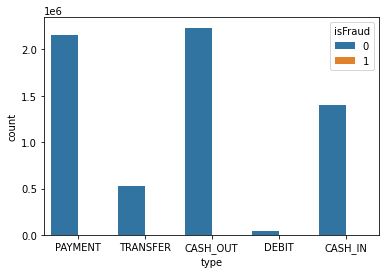

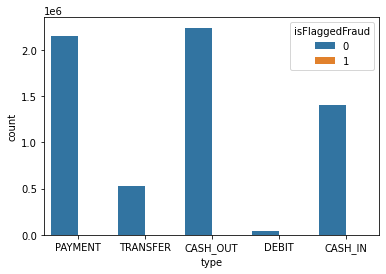

In [39]:
plt.subplot
print(sns.countplot(x='type',data=df,hue='isFraud'))
plt.show()
sns.countplot(x='type',data=df,hue='isFlaggedFraud')
plt.show()

In [40]:
flagged.amount.min(), flagged.amount.max()

(353874.22, 10000000.0)

In [41]:
fraud = df[df.isFraud == 1]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [42]:
print(f"There are a total of {len(fraud)} Fraudulent Transactions in the dataset.")

There are a total of 8213 Fraudulent Transactions in the dataset.


In [43]:
print(f"A total of {round((len(flagged)/len(fraud)) * 100,2)} % of Fraudulent Transactions were Flagged.")

A total of 0.19 % of Fraudulent Transactions were Flagged.


# Relationship between the Source/Destination and our Target Attribute (isFraud)

In [44]:
print(str(len(df[df.newbalanceOrig == 0])))# Transactions had the entire balance of the sender emptied. ie newbalanceOrig = 0

3609566


In [45]:
print(str(len(df[df.oldbalanceDest == 0]))) # Customers had zero balance before Transaction. ie oldbalanceDest = 0

2704388


In [46]:
df.isFraud[df.newbalanceOrig==0].value_counts()

0    3601513
1       8053
Name: isFraud, dtype: int64

In [47]:
df.isFraud[df.oldbalanceDest==0].value_counts()

0    2699037
1       5351
Name: isFraud, dtype: int64

In [48]:
len(fraud)

8213

In [49]:
len(fraud), df.isFraud[df.newbalanceOrig==0].sum()

(8213, 8053)

In [50]:
len(fraud),df.isFraud[df.oldbalanceDest==0].sum()

(8213, 5351)

In [51]:
print(f"In {round(df.isFraud[df.newbalanceOrig==0].sum()/len(fraud) * 100,2)}") #fraudulent Transaction the entire balance of the sender(origin) was emptied

In 98.05


In [52]:
print(f"In {round(df.isFraud[df.oldbalanceDest==0].sum()/len(fraud) * 100,2)}")#Fraudulent Transaction the balance of the recepient was empty before the transaction.


In 65.15


In [53]:
pd.DataFrame({df.isFraud[df.newbalanceOrig==0].sum(),len(fraud)}, index=["Total Fraud", "Zero New Bal Orig"]).T

,Total Fraud,Zero New Bal Orig
0,8213,8053


In [54]:
pd.DataFrame({df.isFraud[df.oldbalanceDest==0].sum(),len(fraud)}, index=["Total Fraud", "Zero old Bal Dest"]).T

,Total Fraud,Zero old Bal Dest
0,8213,5351


# Train test split model

In [55]:
x=df.drop('isFraud',axis=1)
y=df.isFraud.values

In [56]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [57]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
data_nameorigin = []
for i in range(0, len(df)):
    data_nameorigin.append(int(df.nameOrig[i].split("C")[1]))
    

In [61]:
len(data_nameorigin), len(df)

(6362620, 6362620)

In [62]:
x.nameOrig = data_nameorigin
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [63]:
data_namedestination = []
for i in range(0, len(df)):
    if (df.nameDest[i][0] == 'M'):
        data_namedestination.append(int(df.nameDest[i].split("M")[1]))
    else:
        data_namedestination.append(int(df.nameDest[i].split("C")[1]))
    
len(data_namedestination)

6362620

In [64]:
x.nameDest = data_namedestination
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [65]:
## Label Encoding transaction type
x["type"] = x["type"].astype('category')
x["type"] = x["type"].cat.codes
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [66]:
from sklearn.model_selection import train_test_split
np.random.seed(42) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [67]:
len(x_train),len(x_val),len(x_test)

(4072076, 1018020, 1272524)